# Scatter Plot for Time-Series Data in Groups

During the data exploratory phase, we might want to investigate the behavior of data with respect to their labels (groups). The designed `grp_ts_scatter` from [preprocess.py](https://github.com/JQGoh/jqlearning/blob/master/script/preprocess.py) offers the following functionalities:
 1. Scatter plot of your data with respect to the group labels of a chosen feature.
 2. Mark the missing values with red markers.

In addition, I design a helper function `nan_zeroes` to identify the distribution of missing values with respect to x-axis.

This jupyter notebok is available at my Github page: [Scatter-Plot-for-Time-Series-Data-in-Groups.ipynb](https://github.com/JQGoh/jqlearning/blob/master/posts/Scatter-Plot-for-Time-Series-Data-in-Groups.ipynb), and it is included as part of the repository [jqlearning](https://github.com/JQGoh/jqlearning)

In [1]:
# Import functions and load data into a dataframe
import sys
sys.path.append("../")
import pandas as pd
from script.preprocess import grp_ts_scatter, nan_zeroes

kwargs = {"parse_dates": ["utc_time"]}
bj_aq_df = pd.read_csv("beijing_201802_201803_aq.csv", **kwargs)

The following scatter plots are based on the available data.

Based on the following plots, we learn that stationId of zhiwuyuan_aq does not have any data.

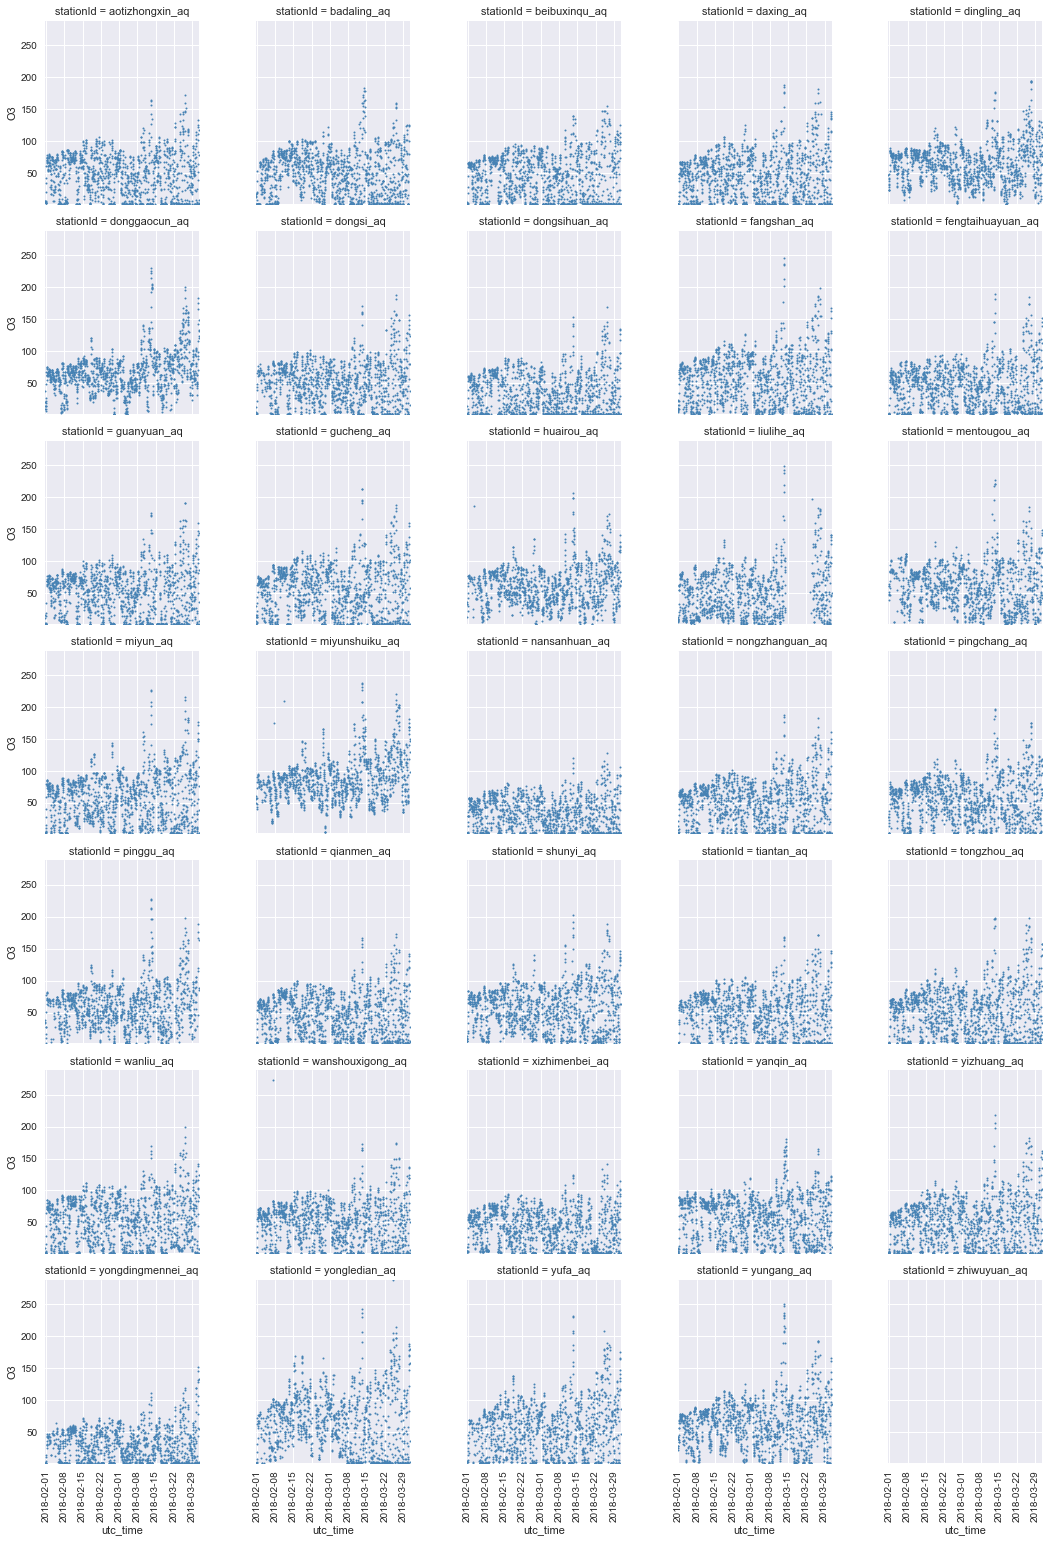

In [2]:
grp_ts_scatter(bj_aq_df, "utc_time", "O3", 
               grp="stationId", col_wrap=5, markersize=2, display_nan=False)

The following scatter plots, using the option `display_nan=True`, can plot the location of missing values (marked by red at zeroes). 

This suggests the distribution of missing values across the groups.

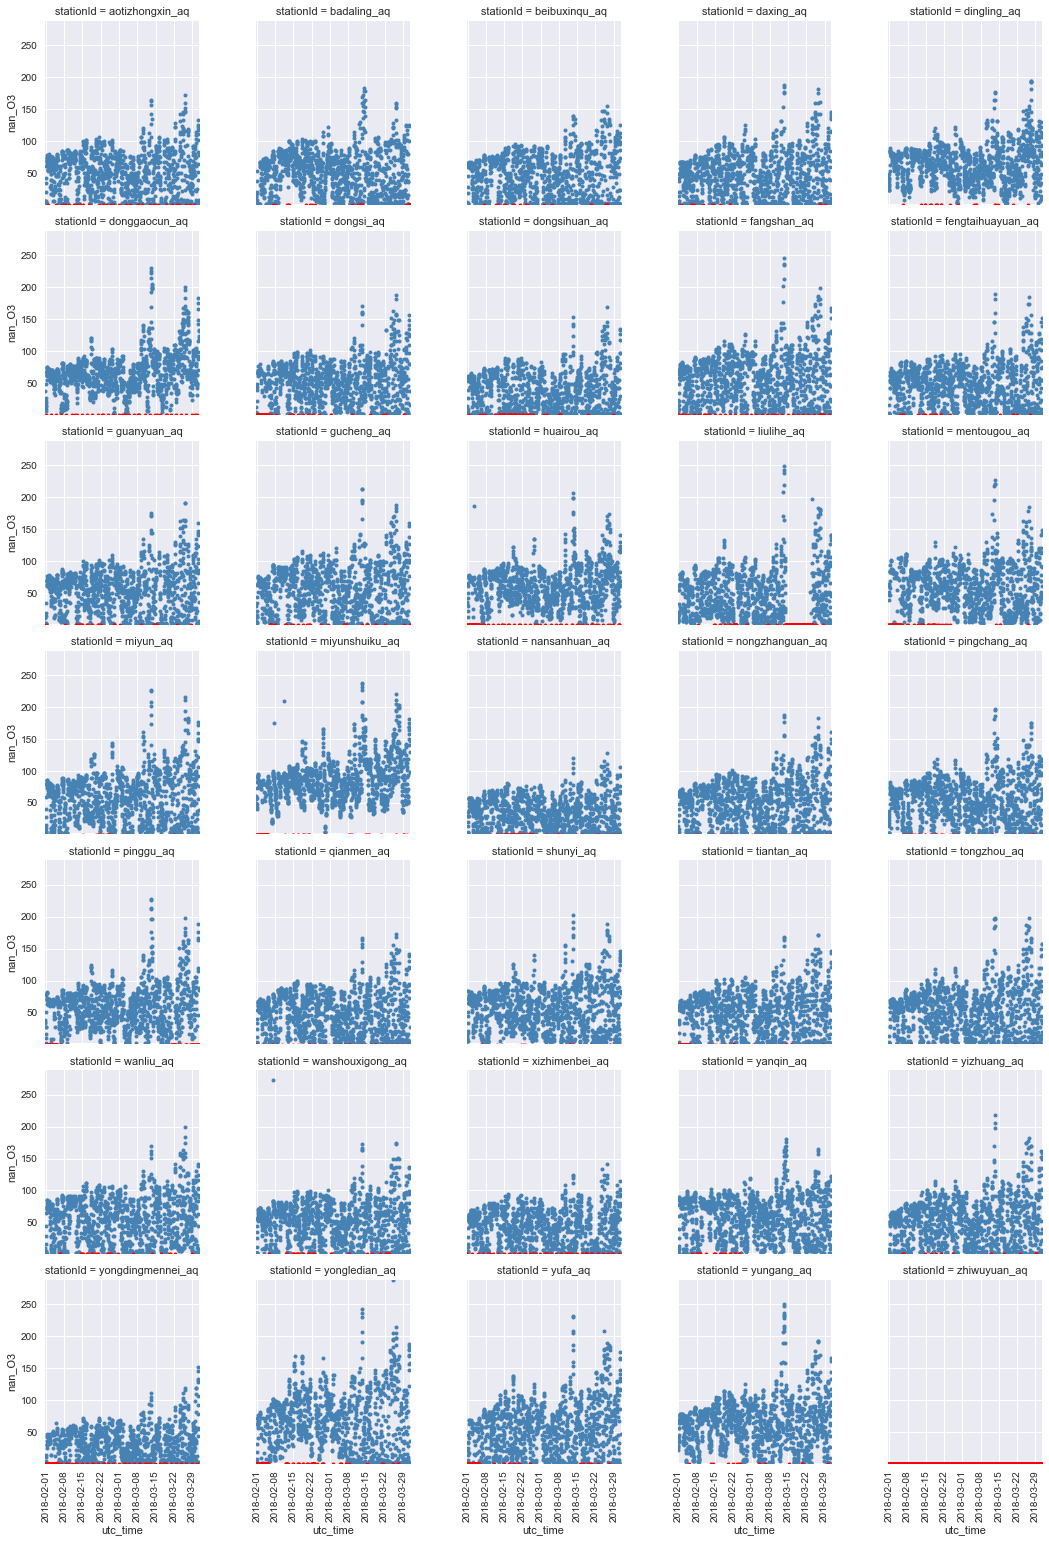

In [3]:
grp_ts_scatter(bj_aq_df, "utc_time", "O3", 
               grp="stationId", col_wrap=5, markersize=4, display_nan=True)

If you would like to investigate further by zooming to data points, you could consider an interactive library such as [Bokeh](https://bokeh.pydata.org/en/latest/)

In [4]:
# Bokeh plot
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

output_notebook()

Loading BokehJS ...

In [5]:
# nan_zeroes will add a column named "nan_O3", which marks the missing values at zeroes
bj_aq_df = nan_zeroes(bj_aq_df, 'O3')

The following interactive plot allows you to hover over the data points and inspect their values

In [6]:
p = figure(x_axis_type='datetime')

# The x-axis values converted to unix-epoch time automatically
# The following @x{%F %T} converts it back to readable datetime format
p.add_tools(HoverTool(tooltips=[("datetime", "@x{%F %T}"), 
                                ("O3", "@y")], formatters={"x": "datetime"}))

# add a circle renderer with a size, color, and alpha
p.circle(bj_aq_df[bj_aq_df['stationId'] == 'aotizhongxin_aq']['utc_time'], 
         bj_aq_df[bj_aq_df['stationId'] == 'aotizhongxin_aq']['O3'], 
         size=3, color="navy", alpha=0.5)
p.circle(bj_aq_df[bj_aq_df['stationId'] == 'aotizhongxin_aq']['utc_time'], 
         bj_aq_df[bj_aq_df['stationId'] == 'aotizhongxin_aq']['nan_O3'], 
         size=3, color="red", alpha=0.5)

show(p)